# LSTM Stock Prediction Model
By Joshua Jenkins

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import plot_model
import yfinance as yf

In [16]:
#Get the Dataset
ticker = input("Enter ticker: ")
start_date = input("Enter start date in format YYYY-MM-DD: ")
end_date = date.today().strftime("%Y-%m-%d")
data = yf.download(ticker, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("Ticker.csv")
df=pd.read_csv("Ticker.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df["Date"] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2022-10-31,138.580002,139.320007,137.570007,138.809998,138.809998,216800,2022-10-31
2022-11-01,138.000000,138.000000,134.470001,135.160004,135.160004,251000,2022-11-01
2022-11-02,136.649994,138.199997,135.250000,135.389999,135.389999,215900,2022-11-02
2022-11-03,135.190002,136.279999,134.229996,135.250000,135.250000,212200,2022-11-03
2022-11-04,136.000000,137.679993,135.600006,137.350006,137.350006,210000,2022-11-04


In [17]:
#Print the shape of Dataframe and check for null values
print("Dataframe Shape:",df.shape)
print("Null Values (if any):",df.isnull().values.any())


Dataframe Shape: (251, 7)
Null Values (if any): False


<Axes: title={'center': 'Microsoft Stock Price'}, xlabel='Date', ylabel='Price (USD)'>

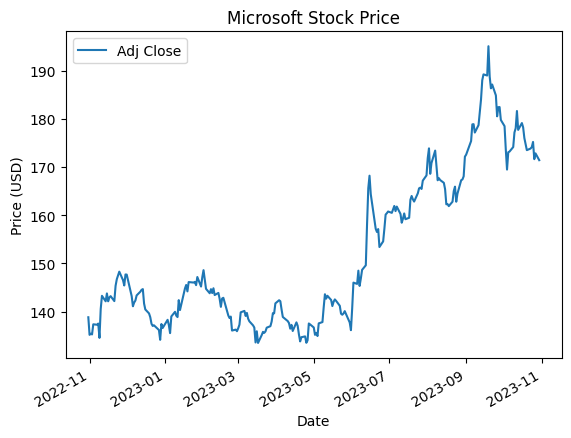

In [18]:
#Plot the closing price of the stock
df.plot(x='Date',y='Adj Close', xlabel = 'Date', ylabel = 'Price (USD)', title = 'Microsoft Stock Price')

In [19]:
#Set target variable as the closing price
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the features
features = ['Open','High','Low','Volume']

In [20]:
#Setting up scaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform = pd.DataFrame(data=feature_transform, columns=features, index=df.index)
feature_transform.head()
feature_transform

,Open,High,Low,Volume
Date,,,,
2022-10-31,0.081072,0.080176,0.084521,0.141391
2022-11-01,0.071534,0.058622,0.034326,0.181288
2022-11-02,0.049334,0.061888,0.046956,0.140341
2022-11-03,0.025325,0.030536,0.030440,0.136024
2022-11-04,0.038645,0.053396,0.052623,0.133458
...,...,...,...,...
2023-10-24,0.650715,0.654638,0.661593,0.104526
2023-10-25,0.700378,0.693501,0.691224,0.166006
2023-10-26,0.646440,0.639288,0.631800,0.139174


In [21]:
#Splitting to train and test set
timesplit = TimeSeriesSplit(n_splits=10)#?
for train_index, test_index in timesplit.split(feature_transform):
    X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
    Y_train, Y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [22]:
#Data Proessing for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
X_test = testX.reshape(testX.shape[0], 1, testX.shape[1])


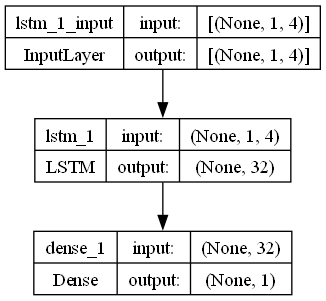

In [23]:
#LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes = True, show_layer_names =True)

In [24]:
#Training the Model
lstm.fit(X_train, Y_train, epochs=200, batch_size=8, verbose=1, shuffle=False)

Epoch 1/200
29/29 [==============================] - 1s 1ms/step - loss: 22612.4082
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 22583.3359
Epoch 3/200
29/29 [==============================] - 0s 1ms/step - loss: 22546.5527
Epoch 4/200
29/29 [==============================] - 0s 1ms/step - loss: 22495.7441
Epoch 5/200
29/29 [==============================] - 0s 1ms/step - loss: 22427.8281
Epoch 6/200
29/29 [==============================] - 0s 1ms/step - loss: 22339.5684
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 22227.5938
Epoch 8/200
29/29 [==============================] - 0s 1ms/step - loss: 22088.9023
Epoch 9/200
29/29 [==============================] - 0s 1ms/step - loss: 21920.9492
Epoch 10/200
29/29 [==============================] - 0s 1ms/step - loss: 21721.7227
Epoch 11/200
29/29 [==============================] - 0s 1ms/step - loss: 21489.8027
Epoch 12/200
29/29 [==============================] - 0s 1ms/step - loss: 

In [25]:
#Prediction
Y_pred = lstm.predict(X_test)
Y_pred

1/1 [==============================] - 0s 131ms/step


array([[180.79636],
       [180.12077],
       [188.42256],
       [210.02574],
       [190.91077],
       [181.43369],
       [167.04659],
       [178.04776],
       [173.24359],
       [190.72914],
       [182.30429],
       [177.3601 ],
       [201.21213],
       [179.02884],
       [182.14926],
       [172.4335 ],
       [170.68047],
       [171.05276],
       [177.21664],
       [171.94128],
       [178.40814],
       [173.61179]], dtype=float32)

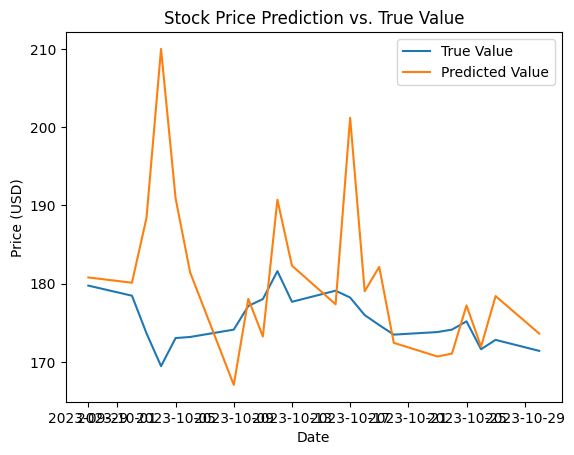

In [26]:
# Plotting the values up until today
plt.plot(df.iloc[test_index]['Date'], Y_test, label='True Value')
plt.plot(df.iloc[test_index]['Date'], Y_pred, label='Predicted Value')
plt.title('Stock Price Prediction vs. True Value')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [27]:
# Fetch the latest data and making a future prediction
latest_data = df.iloc[-1][features].values.reshape(1, len(features))
latest_data_scaled = scaler.transform(latest_data.reshape(1, -1))
next_day_prediction = lstm.predict(latest_data_scaled.reshape(1, 1, len(features)))
next_day = df.index[-1] + pd.Timedelta(days=1)
print("Predicted Stock Price for " + next_day.strftime('%Y-%m-%d') + ":", next_day_prediction[0, 0])

1/1 [==============================] - 0s 15ms/step
Predicted Stock Price for 2023-10-31: 173.61177


c:\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


C:\Users\dajoe\AppData\Local\Temp\ipykernel_23928\1216542488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_week_df['Date'] = last_week_df.index.strftime('%m-%d')


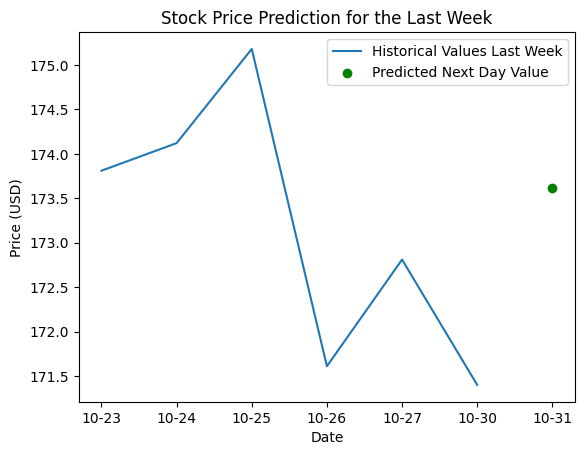

In [28]:
# Filter the dataframe to include only the last week of data
last_week_df = df.loc[df.index >= df.index[-1] - pd.DateOffset(weeks=1)]
last_week_df['Date'] = last_week_df.index.strftime('%m-%d')

# Plot the predicted value along with the previous values for the last week
plt.plot(last_week_df['Date'], last_week_df['Adj Close'], label='Historical Values Last Week')
plt.scatter(next_day.strftime('%m-%d'), next_day_prediction, color='g', label='Predicted Next Day Value')
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Stock Price Prediction for the Last Week")
plt.legend()
plt.show()
